In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring the [derivative](https://en.wikipedia.org/wiki/Derivative)

In [2]:
def f(x):
    """Parabola"""
    a = 1
    b = 0
    c = 0
    return a*x**2 + b*x + c

In [17]:
f(3+0.0001)

9.000600010000001

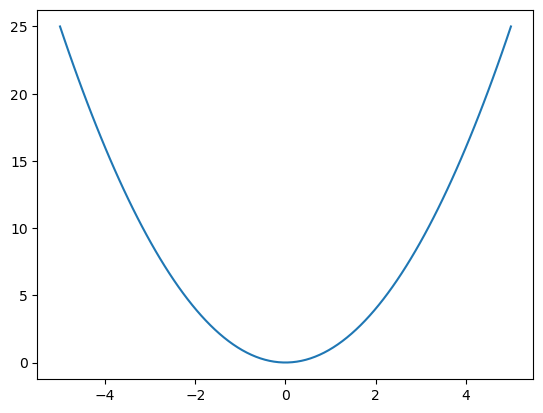

In [5]:
x = np.linspace(-5, 5, 100)
y = f(x)
plt.plot(x, y)
plt.show()

Numerical approximation of the derivative:

$$
L = \lim_{h \rightarrow 0} \frac{f(a + h) - f(a)}{h}
$$

Source: [Wikipedia Derivative](https://en.m.wikipedia.org/wiki/Derivative#Definition)

In [16]:
def L(x, h):
    """Numerical aproximation"""
    return (f(x + h) - f(x))/h

h = 0.0001
x = 3
print(f"Slope: {L(x, h)}")

Slope: 6.000100000012054


interactive(children=(FloatSlider(value=3.0, description='w', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

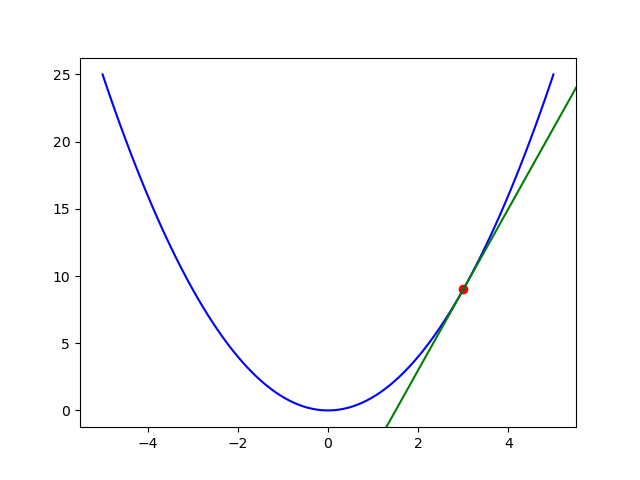

In [18]:
%matplotlib widget
from ipywidgets import *

h = 0.001

xt = np.linspace(-5, 5, 100)
yt = f(xt)

x = 3
y = f(x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

@interact(w=(-5,5,0.1))
def update(w=3):
    print(f"\tSlope: {L(w, h):{4}.{4}}")
    ax.cla()
    ax.plot(xt, yt, c="b")
    ax.scatter(w, f(w), c="r")
    ax.axline((w, f(w)), slope=L(w, h), c='g')
    fig.canvas.draw_idle()

# Python - Tracking operations

In [19]:
class Scalar:
    
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Scalar(data={self.data})"
    
    def __add__(self, rhs):
        return Scalar(self.data + rhs.data, (self, rhs), "Addition")
    
    def __mul__(self, rhs):
        return Scalar(self.data * rhs.data, (self, rhs), "Multiplication")

In [20]:
a = Scalar(2.0, label="a")
b = Scalar(-3, label="b")
c = Scalar(10, label="c")
e = a*b; e.label="e"
d = e + c; d.label="d"
d

Scalar(data=4.0)

In [21]:
d._prev

{Scalar(data=-6.0), Scalar(data=10)}

In [22]:
d._op

'Addition'

In [25]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

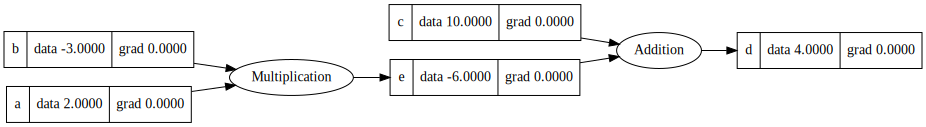

In [26]:
draw_dot(d)